## **AQUECIMENTO ZONA 3 - IMPREGNADORA**

Nos últimos dias onde tivemos evento de prensa continua parada ocorrem falhas de aquecimento na zona 3 da Impregnadora de Papel da unidade de Taquari. 

Ao verificar o local os profissionais de manutenção identificaram que a válvula estava 100% aberta tanto física quanto logicamente, porem a temperatura setada pelos operadores não era atingida. 

Por conta disso em conjunto com o sr Alex Cruz e André Casanova, iniciamos um trabalho de análise das variáveis que são historiadas pelo Pi Vision. 


In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

import plotly.express as px

pd.options.display.max_rows = 300
pd.options.display.max_columns = 100

sns.set()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## **1.SOBRE A BASE DE DADOS**

Todos os dados foram exportados diretamente do PI vision através de conexão que tenho com o Excel

A base de dados utilizada neste estudo foi coletada com o auxilio do Bruno Lopes que nos ensinou como fazer o export dos dados de forma mais eficiente do que a forma como estávamos trabalhando. 


Como o evento ocorreu no mês de Setembro, pegamos dados iniciando no dia 01/09 até o dia 22/09. 

>OBS: O evento ocorreu na madrugado do dia `20` para o dia `21`


### **1.1.SOBRE AS VARIÁVEIS**

Como o objetivo inicial do estudo consistia na identificação de quais variáveis poderiam estar contribuindo para a ineficiência na zona de aquecimento 3, coletamos dados de dos os itens de nosso sistema de aquecimento de óleo térmico.

Foram coletados dados das bombas de aquecimento da prensa continua, bombas de circulação da planta de Energia, ventiladores da Planta, vazão de óleo assim como todas as temperaturas e seus set points de todas as zonas de aquecimento da impregnadora. 

O resultado foi uma tabela inicial com 72 variáveis e mais de 1000 linhas de dados coletados de 30 em 30 minutos. 


In [3]:
df = pd.read_excel('oleo_termico_impreg1.xlsx')
df.head(1)

,Data,Prensa,MDP Aq 01 Posi Val,MDP Aq 01 Temp Entrada,MDP Aq 01 Temp Retorno,MDP Aq 01 Temp Nominal,MDP Aq 01 Temp Prato,MDP Aq 02 Posi Val,MDP Aq 02 Temp Entrada,MDP Aq 02 Temp Retorno,MDP Aq 02 Temp Nominal,MDP Aq 02 Temp Prato,MDP Aq 03 Posi Val,MDP Aq 03 Temp Entrada,MDP Aq 03 Temp Retorno,MDP Aq 03 Temp Nominal,MDP Aq 03 Temp Prato,MDP Aq 04 Posi Val,MDP Aq 04 Temp Entrada,MDP Aq 04 Temp Retorno,MDP Aq 04 Temp Nominal,MDP Aq 04 Temp Prato,MDP Aq 05 Posi Val,MDP Aq 05 Temp Entrada,MDP Aq 05 Temp Retorno,MDP Aq 05 Temp Nominal,MDP Aq 05 Temp Prato,Planta Bomba Secudaria 1 Corrente,Planta Bomba Secudaria 1 Rotacao,Planta Bomba Secudaria 1 Status,Planta Bomba Secudaria 1 Velocidade,Planta Bomba Secudaria 2 Corrente,Planta Bomba Secudaria 2 Rotacao,Planta Bomba Secudaria 2 Status,Planta Bomba Secudaria 2 Velocidade,Planta Bomba Secudaria 3 Corrente,Planta Bomba Secudaria 3 Rotacao,Planta Bomba Secudaria 3 Status,Planta Bomba Secudaria 3 Velocidade,Planta Vazao Oleo Revestido,Impregnadora Vazao Oleo Termico,Impregnadora Temperatura Entrada Oleo,Impregnadora Temperatura de Saida Oleo,Impregnadora Vent zona 1 Set Point Velocidade,Impregnadora Vent zona 1 Set Point Velocidade Real,Impregnadora Vent zona 1 Status,Impregnadora Vent zona 2 Set Point Velocidade,Impregnadora Vent zona 2 Set Point Velocidade Real,Impregnadora Vent zona 2 Status,Impregnadora Vent zona 3 Set Point Velocidade,Impregnadora Vent zona 3 Set Point Velocidade Real,Impregnadora Vent zona 3 Status,Impregnadora Vent zona 4 Set Point Velocidade,Impregnadora Vent zona 4 Set Point Velocidade Real,Impregnadora Vent zona 4 Status,Impregnadora Vent zona 5 Set Point Velocidade,Impregnadora Vent zona 5 Set Point Velocidade Real,Impregnadora Vent zona 5 Status,Impregnadora Aq Zona 1 Set Point Temperatura,Impregnadora Aq Zona 1 Temperatura Real,Impregnadora Aq Zona 1 Posicao Valvula,Impregnadora Aq Zona 2 Set Point Temperatura,Impregnadora Aq Zona 2 Temperatura Real,Impregnadora Aq Zona 2 Posicao Valvula,Impregnadora Aq Zona 3 Set Point Temperatura,Impregnadora Aq Zona 3 Temperatura Real,Impregnadora Aq Zona 3 Posicao Valvula,Impregnadora Aq Zona 4 Set Point Temperatura,Impregnadora Aq Zona 4 Temperatura Real,Impregnadora Aq Zona 4 Posicao Valvula,Impregnadora Aq Zona 5 Set Point Temperatura,Impregnadora Aq Zona 5 Temperatura Real,Impregnadora Aq Zona 5 Posicao Valvula
0,2022-09-01,Fechado,24.010864,247.517517,245.055817,245,4.612755,67.817307,254.783447,249.787796,238,236.867538,68.449203,243.924393,248.399994,238,238.068222,5.418137,200.300003,199.164856,195,195.130768,4.612755,190.699997,190.521912,185,188.5,60,1416.354004,Ligado,80,48.099998,1415.645996,Ligado,80,0,0,Desligado,0,No Data,55.052082,247.531143,251.470871,1696.800049,1688,1,1688,1688,1,1709.599976,1688,1,1709.599976,1700.700073,1,1705.599976,1696,1,110,113.27021,0,110,110.164993,0.073838,163,162.622452,34.117477,158,159.344452,0,153,153.116928,0


In [4]:
df.tail(1)

,Data,Prensa,MDP Aq 01 Posi Val,MDP Aq 01 Temp Entrada,MDP Aq 01 Temp Retorno,MDP Aq 01 Temp Nominal,MDP Aq 01 Temp Prato,MDP Aq 02 Posi Val,MDP Aq 02 Temp Entrada,MDP Aq 02 Temp Retorno,MDP Aq 02 Temp Nominal,MDP Aq 02 Temp Prato,MDP Aq 03 Posi Val,MDP Aq 03 Temp Entrada,MDP Aq 03 Temp Retorno,MDP Aq 03 Temp Nominal,MDP Aq 03 Temp Prato,MDP Aq 04 Posi Val,MDP Aq 04 Temp Entrada,MDP Aq 04 Temp Retorno,MDP Aq 04 Temp Nominal,MDP Aq 04 Temp Prato,MDP Aq 05 Posi Val,MDP Aq 05 Temp Entrada,MDP Aq 05 Temp Retorno,MDP Aq 05 Temp Nominal,MDP Aq 05 Temp Prato,Planta Bomba Secudaria 1 Corrente,Planta Bomba Secudaria 1 Rotacao,Planta Bomba Secudaria 1 Status,Planta Bomba Secudaria 1 Velocidade,Planta Bomba Secudaria 2 Corrente,Planta Bomba Secudaria 2 Rotacao,Planta Bomba Secudaria 2 Status,Planta Bomba Secudaria 2 Velocidade,Planta Bomba Secudaria 3 Corrente,Planta Bomba Secudaria 3 Rotacao,Planta Bomba Secudaria 3 Status,Planta Bomba Secudaria 3 Velocidade,Planta Vazao Oleo Revestido,Impregnadora Vazao Oleo Termico,Impregnadora Temperatura Entrada Oleo,Impregnadora Temperatura de Saida Oleo,Impregnadora Vent zona 1 Set Point Velocidade,Impregnadora Vent zona 1 Set Point Velocidade Real,Impregnadora Vent zona 1 Status,Impregnadora Vent zona 2 Set Point Velocidade,Impregnadora Vent zona 2 Set Point Velocidade Real,Impregnadora Vent zona 2 Status,Impregnadora Vent zona 3 Set Point Velocidade,Impregnadora Vent zona 3 Set Point Velocidade Real,Impregnadora Vent zona 3 Status,Impregnadora Vent zona 4 Set Point Velocidade,Impregnadora Vent zona 4 Set Point Velocidade Real,Impregnadora Vent zona 4 Status,Impregnadora Vent zona 5 Set Point Velocidade,Impregnadora Vent zona 5 Set Point Velocidade Real,Impregnadora Vent zona 5 Status,Impregnadora Aq Zona 1 Set Point Temperatura,Impregnadora Aq Zona 1 Temperatura Real,Impregnadora Aq Zona 1 Posicao Valvula,Impregnadora Aq Zona 2 Set Point Temperatura,Impregnadora Aq Zona 2 Temperatura Real,Impregnadora Aq Zona 2 Posicao Valvula,Impregnadora Aq Zona 3 Set Point Temperatura,Impregnadora Aq Zona 3 Temperatura Real,Impregnadora Aq Zona 3 Posicao Valvula,Impregnadora Aq Zona 4 Set Point Temperatura,Impregnadora Aq Zona 4 Temperatura Real,Impregnadora Aq Zona 4 Posicao Valvula,Impregnadora Aq Zona 5 Set Point Temperatura,Impregnadora Aq Zona 5 Temperatura Real,Impregnadora Aq Zona 5 Posicao Valvula
1008,2022-09-22,Fechado,25.177307,247.972733,245.024063,245,5.31988,72.966103,253.821487,249.008926,238,236.714737,63.703209,240.399994,244.600006,235,235.029266,1.295647,193.699997,193.116882,190,190.527802,5.31988,187.992584,187.989944,185,186.390945,60.799999,1415.911499,Ligado,80,48.325001,1416.796509,Ligado,80,0,0,Desligado,0,No Data,61.319443,246.24379,240.499603,1703.599976,1693.599976,1,1693.599976,1693.599976,1,1709.269531,1693.599976,1,1709.269287,1700.369263,1,1707.200073,1697.900024,1,130,131.399994,0,130,129.944443,2.846389,169,169.117569,25.183136,165,164.440536,30.055216,160,160.008087,8.491204


In [5]:
df.shape

(1009, 73)

In [6]:
df.dtypes.head()

Data                      datetime64[ns]
Prensa                            object
MDP Aq 01 Posi Val                object
MDP Aq 01 Temp Entrada            object
MDP Aq 01 Temp Retorno            object
dtype: object

### **1.3.LIMPEZA DOS DADOS**

Apesar de recebermos os dados de forma bem estruturada quando os dados são exportados, temos alguns pequenos problemas que devem ser tratados, principalmente se vamos empregar modelos de Machine Learning para análise. 

Alguns problemas que podemos citar são: dados com informações faltantes, dados com informações categóricas (Ligado e Desligado) e dados com mensagens de erro do próprio banco de dados.




>Nas linhas abaixo o procedimento de limpeza é realizado

In [7]:
# Colunas que possuem Dados Categóricos
remove = ['Planta Bomba Secudaria 1 Status', 'Planta Bomba Secudaria 2 Status','Planta Bomba Secudaria 3 Status' , 
'Planta Vazao Oleo Revestido','Prensa' ]

In [8]:
# Criando cópia da Base de dados Original para aplicar o procedimento de limpeza dos dados
df2 = df.copy()

In [9]:
# Tratando dados Liga e Delisga - Criando Função
def binario(x):
    if x == 'Ligado':
        return 1
    elif x == 'Desligado':
        return 0
    elif x == 'Aberto':
        return 0
    elif x == 'Fechado':
        return 1
    else:
        return np.NaN
# Aplicando a função nos dados Categóricos da Base
for i in remove:
    df2[i] = df2[i].map(binario)

In [10]:
# Verificando o resultado do tratamento dos Dados
df2['Prensa'].value_counts()

1.0    511
0.0    497
Name: Prensa, dtype: int64

In [11]:
# Tratando Dados Intf Shut
def inshuf(x):
    if x == 'Intf Shut':
        return np.NaN
    else:
        return x

for i in df2.columns:
    df2[i] = df2[i].map(inshuf)

In [12]:
# Transformando os dados em Float
for i in df2.columns:
    if i != 'Data':
        df2[i] = df2[i].astype('float')
    else:
        continue

In [13]:
# Verificando o resultado na base
df2.head(1)

,Data,Prensa,MDP Aq 01 Posi Val,MDP Aq 01 Temp Entrada,MDP Aq 01 Temp Retorno,MDP Aq 01 Temp Nominal,MDP Aq 01 Temp Prato,MDP Aq 02 Posi Val,MDP Aq 02 Temp Entrada,MDP Aq 02 Temp Retorno,MDP Aq 02 Temp Nominal,MDP Aq 02 Temp Prato,MDP Aq 03 Posi Val,MDP Aq 03 Temp Entrada,MDP Aq 03 Temp Retorno,MDP Aq 03 Temp Nominal,MDP Aq 03 Temp Prato,MDP Aq 04 Posi Val,MDP Aq 04 Temp Entrada,MDP Aq 04 Temp Retorno,MDP Aq 04 Temp Nominal,MDP Aq 04 Temp Prato,MDP Aq 05 Posi Val,MDP Aq 05 Temp Entrada,MDP Aq 05 Temp Retorno,MDP Aq 05 Temp Nominal,MDP Aq 05 Temp Prato,Planta Bomba Secudaria 1 Corrente,Planta Bomba Secudaria 1 Rotacao,Planta Bomba Secudaria 1 Status,Planta Bomba Secudaria 1 Velocidade,Planta Bomba Secudaria 2 Corrente,Planta Bomba Secudaria 2 Rotacao,Planta Bomba Secudaria 2 Status,Planta Bomba Secudaria 2 Velocidade,Planta Bomba Secudaria 3 Corrente,Planta Bomba Secudaria 3 Rotacao,Planta Bomba Secudaria 3 Status,Planta Bomba Secudaria 3 Velocidade,Planta Vazao Oleo Revestido,Impregnadora Vazao Oleo Termico,Impregnadora Temperatura Entrada Oleo,Impregnadora Temperatura de Saida Oleo,Impregnadora Vent zona 1 Set Point Velocidade,Impregnadora Vent zona 1 Set Point Velocidade Real,Impregnadora Vent zona 1 Status,Impregnadora Vent zona 2 Set Point Velocidade,Impregnadora Vent zona 2 Set Point Velocidade Real,Impregnadora Vent zona 2 Status,Impregnadora Vent zona 3 Set Point Velocidade,Impregnadora Vent zona 3 Set Point Velocidade Real,Impregnadora Vent zona 3 Status,Impregnadora Vent zona 4 Set Point Velocidade,Impregnadora Vent zona 4 Set Point Velocidade Real,Impregnadora Vent zona 4 Status,Impregnadora Vent zona 5 Set Point Velocidade,Impregnadora Vent zona 5 Set Point Velocidade Real,Impregnadora Vent zona 5 Status,Impregnadora Aq Zona 1 Set Point Temperatura,Impregnadora Aq Zona 1 Temperatura Real,Impregnadora Aq Zona 1 Posicao Valvula,Impregnadora Aq Zona 2 Set Point Temperatura,Impregnadora Aq Zona 2 Temperatura Real,Impregnadora Aq Zona 2 Posicao Valvula,Impregnadora Aq Zona 3 Set Point Temperatura,Impregnadora Aq Zona 3 Temperatura Real,Impregnadora Aq Zona 3 Posicao Valvula,Impregnadora Aq Zona 4 Set Point Temperatura,Impregnadora Aq Zona 4 Temperatura Real,Impregnadora Aq Zona 4 Posicao Valvula,Impregnadora Aq Zona 5 Set Point Temperatura,Impregnadora Aq Zona 5 Temperatura Real,Impregnadora Aq Zona 5 Posicao Valvula
0,2022-09-01,1.0,24.010864,247.517517,245.055817,245.0,4.612755,67.817307,254.783447,249.787796,238.0,236.867538,68.449203,243.924393,248.399994,238.0,238.068222,5.418137,200.300003,199.164856,195.0,195.130768,4.612755,190.699997,190.521912,185.0,188.5,60.0,1416.354004,1.0,80.0,48.099998,1415.645996,1.0,80.0,0.0,0.0,0.0,0.0,NaN,55.052082,247.531143,251.470871,1696.800049,1688.0,1.0,1688.0,1688.0,1.0,1709.599976,1688.0,1.0,1709.599976,1700.700073,1.0,1705.599976,1696.0,1.0,110.0,113.27021,0.0,110.0,110.164993,0.073838,163.0,162.622452,34.117477,158.0,159.344452,0.0,153.0,153.116928,0.0


In [14]:
# Preenchendo os dados Faltantes ou nulos com o Valor Anterior Válido
# Como a variação dos dados não é tão expressiva, optei por aplicar esta técnica
df2.fillna(method='ffill', inplace = True)

In [15]:
# Exlcuido Colunas que possuem dados que não são confiáveis
# A primeira colune é a Data que não será utilizada neste primeiro momento
# A seungunda Coluna "Planta Vazao Oleo Revestido" está lendo dados de um sensor descalibrado
df3 = df2.drop(['Data', 'Planta Vazao Oleo Revestido'], axis = 1)

In [16]:
df3.head()

,Prensa,MDP Aq 01 Posi Val,MDP Aq 01 Temp Entrada,MDP Aq 01 Temp Retorno,MDP Aq 01 Temp Nominal,MDP Aq 01 Temp Prato,MDP Aq 02 Posi Val,MDP Aq 02 Temp Entrada,MDP Aq 02 Temp Retorno,MDP Aq 02 Temp Nominal,MDP Aq 02 Temp Prato,MDP Aq 03 Posi Val,MDP Aq 03 Temp Entrada,MDP Aq 03 Temp Retorno,MDP Aq 03 Temp Nominal,MDP Aq 03 Temp Prato,MDP Aq 04 Posi Val,MDP Aq 04 Temp Entrada,MDP Aq 04 Temp Retorno,MDP Aq 04 Temp Nominal,MDP Aq 04 Temp Prato,MDP Aq 05 Posi Val,MDP Aq 05 Temp Entrada,MDP Aq 05 Temp Retorno,MDP Aq 05 Temp Nominal,MDP Aq 05 Temp Prato,Planta Bomba Secudaria 1 Corrente,Planta Bomba Secudaria 1 Rotacao,Planta Bomba Secudaria 1 Status,Planta Bomba Secudaria 1 Velocidade,Planta Bomba Secudaria 2 Corrente,Planta Bomba Secudaria 2 Rotacao,Planta Bomba Secudaria 2 Status,Planta Bomba Secudaria 2 Velocidade,Planta Bomba Secudaria 3 Corrente,Planta Bomba Secudaria 3 Rotacao,Planta Bomba Secudaria 3 Status,Planta Bomba Secudaria 3 Velocidade,Impregnadora Vazao Oleo Termico,Impregnadora Temperatura Entrada Oleo,Impregnadora Temperatura de Saida Oleo,Impregnadora Vent zona 1 Set Point Velocidade,Impregnadora Vent zona 1 Set Point Velocidade Real,Impregnadora Vent zona 1 Status,Impregnadora Vent zona 2 Set Point Velocidade,Impregnadora Vent zona 2 Set Point Velocidade Real,Impregnadora Vent zona 2 Status,Impregnadora Vent zona 3 Set Point Velocidade,Impregnadora Vent zona 3 Set Point Velocidade Real,Impregnadora Vent zona 3 Status,Impregnadora Vent zona 4 Set Point Velocidade,Impregnadora Vent zona 4 Set Point Velocidade Real,Impregnadora Vent zona 4 Status,Impregnadora Vent zona 5 Set Point Velocidade,Impregnadora Vent zona 5 Set Point Velocidade Real,Impregnadora Vent zona 5 Status,Impregnadora Aq Zona 1 Set Point Temperatura,Impregnadora Aq Zona 1 Temperatura Real,Impregnadora Aq Zona 1 Posicao Valvula,Impregnadora Aq Zona 2 Set Point Temperatura,Impregnadora Aq Zona 2 Temperatura Real,Impregnadora Aq Zona 2 Posicao Valvula,Impregnadora Aq Zona 3 Set Point Temperatura,Impregnadora Aq Zona 3 Temperatura Real,Impregnadora Aq Zona 3 Posicao Valvula,Impregnadora Aq Zona 4 Set Point Temperatura,Impregnadora Aq Zona 4 Temperatura Real,Impregnadora Aq Zona 4 Posicao Valvula,Impregnadora Aq Zona 5 Set Point Temperatura,Impregnadora Aq Zona 5 Temperatura Real,Impregnadora Aq Zona 5 Posicao Valvula
0,1.0,24.010864,247.517517,245.055817,245.0,4.612755,67.817307,254.783447,249.787796,238.0,236.867538,68.449203,243.924393,248.399994,238.0,238.068222,5.418137,200.300003,199.164856,195.0,195.130768,4.612755,190.699997,190.521912,185.0,188.500000,60.000000,1416.354004,1.0,80.0,48.099998,1415.645996,1.0,80.0,0.0,0.0,0.0,0.0,55.052082,247.531143,251.470871,1696.800049,1688.0,1.0,1688.0,1688.0,1.0,1709.599976,1688.0,1.0,1709.599976,1700.700073,1.0,1705.599976,1696.0,1.0,110.0,113.270210,0.000000,110.0,110.164993,0.073838,163.0,162.622452,34.117477,158.0,159.344452,0.000000,153.0,153.116928,0.000000
1,1.0,23.995277,247.705795,245.186508,245.0,4.612755,70.932205,254.932648,249.903641,238.0,237.160400,70.053474,243.909653,248.399994,238.0,238.086853,5.354057,200.300003,199.126678,195.0,195.169861,4.612755,190.699997,190.509720,185.0,188.500000,60.000000,1416.044189,1.0,80.0,47.900002,1416.000000,1.0,80.0,0.0,0.0,0.0,0.0,55.606194,246.717041,242.422607,1696.800049,1688.0,1.0,1688.0,1688.0,1.0,1709.599976,1688.0,1.0,1709.599976,1700.700073,1.0,1705.599976,1696.0,1.0,110.0,115.220001,0.000000,110.0,109.933327,0.382883,163.0,162.597290,47.028351,158.0,158.729263,6.292542,153.0,153.345459,0.000000
2,1.0,23.286049,247.555817,244.910095,245.0,4.612755,63.305084,254.909210,249.601791,238.0,236.574997,67.513367,243.791992,248.100006,238.0,237.317917,5.963676,200.339050,198.921326,195.0,194.699997,4.612755,190.931183,190.631958,185.0,188.600922,59.533333,1415.933594,1.0,80.0,48.400002,1415.468994,1.0,80.0,0.0,0.0,0.0,0.0,46.527779,248.233627,262.659149,1696.800049,1688.0,1.0,1688.0,1688.0,1.0,1709.599976,1688.0,1.0,1709.599976,1700.700073,1.0,1705.599976,1

## **2. SOBRE A ESTRATÉGIA DE ANÁLISE**

Para este estudo utilizaremos duas estratégias distintas a fim de identificar quais variáveis podem ter uma contribuição mais significativa para o evento.

A primeira estratégia consiste em agrupar todos os dados e a segunda será a de aplicar algoritmos de Random Forest dentro de cada um dos grupos identificados pelo K-means . 


In [17]:
# Me certificando de que não existem dados nulos na Base
df3.dropna(inplace = True)

In [18]:
# Realizando procedimento dos dados da colunas não categóricas

for i in df3.columns:
    df3[i] = df3[i].map(inshuf)

In [19]:
# Criando um Data Frame para armazenar dados Escalonados
# O Algoritmo de Classificação utiliza distancia euclidiana. Por isso o escalonamento dos dados
escala = StandardScaler()
escalonados = escala.fit_transform(df3)

### **2.1.Calulando a Quantidade de Grupos**

Antes de rodar o algoritmo é importante ter uma noção de qual a melhor quantidade de grupos passar como parametro para a função de agrupamento.

Para descobrir esta quantidade, vou fazer uso do método do cotovelo que basicamente recebe um range como parametro e vai armazenando os resultados de perda da funcção em uma lista, que neste caso chamei de resultado.

Aqui não existe um numero exato e vale muita experimentação para ver se os agrupamentos refletem de fato o problema que estamos enfrentanto.

c:\Users\evaldjun\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\evaldjun\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


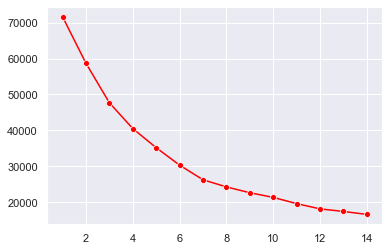

In [20]:
resultado = []

tamanho = range(1,15)

for i in tamanho:
    kkmeans = KMeans(n_clusters= i, init = 'k-means++', random_state=5, max_iter=300)
    kkmeans.fit(escalonados)
    resultado.append(kkmeans.inertia_)

sns.lineplot(tamanho, resultado, marker = 'o', color = 'red');


In [21]:
kmeans = KMeans(n_clusters=6, init ='k-means++', random_state=5, max_iter=300)
k_mean = kmeans.fit(escalonados)

 ### **2.2.Resultados dos Agrupamentos**

Agora crio um novo Data Frame para armazenar todos os dados e junta-los com os grupos que acabei de encontrar com KNN

Tambem aproveito para criar duas novas  Features, o Dia e a Hora para que eu possa furamente refinar os filtros caso sinta que existe a necessidade.

In [74]:
df4= df3.copy()
df4.dropna(inplace= True) # Limpando Dados Nulos
df4['Grupo'] = k_mean.labels_ # Criando colunas para os grupos
df4['Data'] = df['Data'].values # Pegando Datas do DF Original
df4['Dia'] = df['Data'].dt.day # Criando e populando coluna Day 
df4['Hora'] = df['Data'].dt.hour # Criando e populando coluna Hora
# Verificando a quantidade de itens de cada Grupo
df4['Grupo'].value_counts()

4    413
2    163
5    143
1    125
0    100
3     65
Name: Grupo, dtype: int64

In [188]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## **APLICANDO REGRESSÃO LINEAR**

In [233]:
# Função para realizar os calculos

def regressao(data):
    cor  = data.corr()['Impregnadora Aq Zona 3 Temperatura Real']
    cor = abs(cor)
    temp = pd.DataFrame({'Variavel': cor.index, 'Valor':cor.values})
    mais  = temp.query('Valor >= .10')
    data = data[mais['Variavel'].values]

    # Separando Dados entre Preditores e Alvo
    y = data['Impregnadora Aq Zona 3 Temperatura Real']
    x1 = data.drop(['Impregnadora Aq Zona 3 Temperatura Real'], axis = 1)

    # Escalonando os Dados para passar ao modelo
    escala = StandardScaler()
    x = escala.fit_transform(x1)

    # Separando dados em teste e treino
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state= 43)

    # Fitando o modelo
    rf = RandomForestRegressor()
    rf.fit(x_train, y_train)

    # Fazendo predições em dados de Teste e Treino
    predicaoTeste = rf.predict(x_test)
    predicaoTreino = rf.predict(x_train)

    # Imprimindo resultados de Teste
    r2 = r2_score(y_test, predicaoTeste)
    mae = mean_absolute_error(y_test,predicaoTeste)
    RMSE_train = np.sqrt(mae)
    print('Dados de Treino')
    print(f'R Quadrado: {r2}')
    print(f'Mae: {mae}')
    print(f'RMSE: {RMSE_train}')
    print(f'{round(mae / y.mean() * 100,2)}')

    # Imprimindo resultados de Treino
    r2 = r2_score(y_train, predicaoTreino)
    mae = mean_absolute_error(y_train, predicaoTreino)
    RMSE_train = np.sqrt(mae)
    print()
    print(f'R Quadrado: {r2}')
    print(f'Mae: {mae}')
    print(f'RMSE: {RMSE_train}')
    print(f'{round(mae / y.mean() * 100,2)}')

    # Criando DataFrame para aramazenar dados das Principais Variáveis
    importantes = pd.DataFrame({'Variaveis': x1.columns, 'Importancia': rf.feature_importances_})
    display(importantes.sort_values(by= 'Importancia', ascending = False).head(20))



### **GRUPO 0**

In [235]:
grupo0 = df4.query('Grupo == 0')
regressao(grupo0)

Dados de Treino
R Quadrado: 0.9905990153712337
Mae: 2.7163323338826517
RMSE: 1.6481299505447535
1.94

R Quadrado: 0.9904792344243386
Mae: 1.193493189130511
RMSE: 1.092471138808944
0.85


,Variaveis,Importancia
54,Impregnadora Aq Zona 4 Temperatura Real,0.134716
56,Impregnadora Aq Zona 5 Temperatura Real,0.106200
6,MDP Aq 02 Temp Retorno,0.095443
47,Impregnadora Aq Zona 1 Temperatura Real,0.069226
34,Impregnadora Vent zona 1 Set Point Velocidade ...,0.048554
35,Impregnadora Vent zona 1 Status,0.046885
45,Impregnadora Vent zona 5 Status,0.046664
5,MDP Aq 02 Temp Entrada,0.041354
50,Impregnadora Aq Zona 2 Temperatura Real,0.041316
39,Impregnadora Vent zona 3 Set Point Velocidade ...,0.030113


### **GRUPO 1**

In [236]:
grupo1 = df4.query('Grupo == 1')
regressao(grupo1)

Dados de Treino
R Quadrado: 0.18887620018251983
Mae: 3.654925854331568
RMSE: 1.9117860378011886
2.23

R Quadrado: 0.9360909230599093
Mae: 0.4081647570379843
RMSE: 0.6388777324637198
0.25


,Variaveis,Importancia
41,Impregnadora Aq Zona 4 Set Point Temperatura,0.144008
44,Impregnadora Aq Zona 5 Set Point Temperatura,0.143486
45,Impregnadora Aq Zona 5 Temperatura Real,0.137722
40,Impregnadora Aq Zona 3 Set Point Temperatura,0.078019
42,Impregnadora Aq Zona 4 Temperatura Real,0.070271
17,MDP Aq 05 Temp Entrada,0.054621
18,MDP Aq 05 Temp Retorno,0.051307
30,Impregnadora Vent zona 3 Set Point Velocidade,0.043867
16,MDP Aq 04 Temp Prato,0.036258
46,Impregnadora Aq Zona 5 Posicao Valvula,0.028217


### **GRUPO 2**

In [237]:
grupo2 = df4.query('Grupo == 2')
regressao(grupo2)

Dados de Treino
R Quadrado: 0.7516606200473699
Mae: 1.7949292755126944
RMSE: 1.339749706293192
1.15

R Quadrado: 0.9656946349289413
Mae: 0.9216424881784542
RMSE: 0.9600221290045632
0.59


,Variaveis,Importancia
47,Impregnadora Aq Zona 3 Posicao Valvula,0.214258
50,Impregnadora Aq Zona 5 Temperatura Real,0.091304
32,Impregnadora Vent zona 2 Status,0.086099
45,Impregnadora Aq Zona 2 Temperatura Real,0.075609
43,Impregnadora Aq Zona 1 Temperatura Real,0.074229
49,Impregnadora Aq Zona 4 Temperatura Real,0.071748
27,Impregnadora Temperatura de Saida Oleo,0.064282
41,Impregnadora Vent zona 5 Status,0.060246
34,Impregnadora Vent zona 3 Set Point Velocidade ...,0.027857
38,Impregnadora Vent zona 4 Status,0.025097


### **GRUPO 3**

In [238]:
grupo3 = df4.query('Grupo == 3')
regressao(grupo3)

Dados de Treino
R Quadrado: -219.7776666037601
Mae: 11.681198211669921
RMSE: 3.4177767937169214
-31.29

R Quadrado: 0.9126828190127421
Mae: 61.02147654045953
RMSE: 7.811624449527738
-163.44


,Variaveis,Importancia
15,Impregnadora Temperatura de Saida Oleo,0.142846
20,Impregnadora Aq Zona 1 Temperatura Real,0.118463
13,Impregnadora Vazao Oleo Termico,0.110523
23,Impregnadora Aq Zona 2 Temperatura Real,0.110394
14,Impregnadora Temperatura Entrada Oleo,0.110015
30,Impregnadora Aq Zona 5 Temperatura Real,0.098240
17,Impregnadora Vent zona 4 Set Point Velocidade,0.070461
27,Impregnadora Aq Zona 4 Temperatura Real,0.047907
29,Impregnadora Aq Zona 5 Set Point Temperatura,0.030459
32,Dia,0.029076


### **GRUPO 4**

In [239]:
grupo4 = df4.query('Grupo == 4')
regressao(grupo4)

Dados de Treino
R Quadrado: 0.29873965724459806
Mae: 3.205915250162924
RMSE: 1.7905069813220287
2.0

R Quadrado: 0.9158942286714518
Mae: 1.311473496248978
RMSE: 1.1451958331433878
0.82


,Variaveis,Importancia
14,Planta Bomba Secudaria 2 Corrente,0.256174
17,Impregnadora Vazao Oleo Termico,0.113161
32,Impregnadora Aq Zona 3 Posicao Valvula,0.083703
12,Planta Bomba Secudaria 1 Rotacao,0.083336
9,MDP Aq 04 Temp Retorno,0.040672
6,MDP Aq 03 Posi Val,0.038405
11,Planta Bomba Secudaria 1 Corrente,0.037324
31,Impregnadora Aq Zona 3 Set Point Temperatura,0.036585
10,MDP Aq 04 Temp Prato,0.035469
15,Planta Bomba Secudaria 2 Rotacao,0.033969


### **GRUPO 5**

In [240]:
grupo5 = df4.query('Grupo == 5')
regressao(grupo5)

Dados de Treino
R Quadrado: -3.130736646252144
Mae: 22.477446688718576
RMSE: 4.741038566466062
143.76

R Quadrado: 0.9184183802196505
Mae: 37.060956514596946
RMSE: 6.087771062925818
237.04


,Variaveis,Importancia
2,MDP Aq 03 Temp Entrada,0.336786
19,Impregnadora Aq Zona 5 Temperatura Real,0.312320
3,Impregnadora Vazao Oleo Termico,0.061101
16,Impregnadora Aq Zona 4 Temperatura Real,0.060470
5,Impregnadora Temperatura de Saida Oleo,0.060119
13,Impregnadora Aq Zona 2 Temperatura Real,0.048351
4,Impregnadora Temperatura Entrada Oleo,0.046463
11,Impregnadora Aq Zona 1 Temperatura Real,0.040424
1,MDP Aq 03 Posi Val,0.018542
0,Prensa,0.009533
